## CAPSTONE PROJECT - CLUSTERING
Nama : Bayuzen Ahmad

## PROBLEM STATEMENT
On this Project we will distinguish customer into several groups to determine the appropriate treatment for the customer group so as to increase the sense of customer satisfaction and customer confidence in the company

### Following is the Data Dictionary for Credit Card dataset :-

* **CUST_ID** : Identification of Credit Card holder (Categorical). <br>
* **BALANCE** : Balance amount left in their account to make purchases. <br>
* **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated). <br>

* **PURCHASES** : Amount of purchases made from account. <br>

* **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go. <br>

* **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment. <br>

* **CASH_ADVANCE** : Cash in advance given by the user. <br>

* **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased). <br>

* **ONEOFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased). <br>

* **PURCHASES_INSTALLMENTS_FREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done). <br>

* **CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid. <br>

* **CASH_ADVANCE_TRX** : Number of Transactions made with "Cash in Advanced". <br>

* **PURCHASES_TRX** : Numbe of purchase transactions made. <br>

* **CREDIT_LIMIT** : Limit of Credit Card for user. <br>

* **PAYMENTS** : Amount of Payment done by user. <br>

* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user. <br>

* **PRC_FULL_PAYMENT** : Percent of full payment paid by user. <br>

* **TENURE** : Tenure of credit card service for user. <br>

## IMPORT PACKAGES

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.simplefilter("ignore")

## READ DATASET

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Belajar Narasio/Jr data Science/day 2/credit_card_user_segmentation.csv')

In [ ]:
data.head('/content/gdrive/MyDrive/dicoding academy/Capstone Project/credit_card_user_segmentation.csv')

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cust_ID                        8950 non-null   object 
 1   Saldo                          8950 non-null   float64
 2   Frekuensi_Saldo                8950 non-null   float64
 3   Pembelian                      8950 non-null   float64
 4   Pembelian_Satu_Kali            8950 non-null   float64
 5   Pembelian_Angsuran             8950 non-null   float64
 6   Uang_Dibayar_Dimuka            8950 non-null   float64
 7   Frekuensi_Pembelian            8950 non-null   float64
 8   Frekuensi_Pembelian_Satu_Kali  8950 non-null   float64
 9   Frekuensi_Pembelian_Angsuran   8950 non-null   float64
 10  Frekuensi_Uang_Dibayar_Dimuka  8950 non-null   float64
 11  Transaksi_Uang_Dibayar_Dimuka  8950 non-null   int64  
 12  Transaksi_Pembelian            8950 non-null   i

berdasarkan informasi pada data :
1. terdapat 16 kolom yang terdiri dari 8950 data. <br>
2. terdapat missing value pada kolom batas_kredit dan pembayaran minimal. <br>
3. tipe untuk tiap kolom telah sesuai. <br>
4. pada dataset terdapat 1 tipe data objek, 3 tipe data integer dan 14 tipe data float. 

In [ ]:
data.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


berdasarkan dari deskripsi statistic: <br>
1. saldo rata rata customer adalah 1564.47, terdapat customer yang memiliki jumlah saldo 0, dan terdapat customer dengan dengan jumlah saldo maksimal 19043.14. <br>
2.rata rata frekuensi saldo pelanggan adalah 0.877 sehingga customer memiliki perilaku sering memperbarui saldo, kemudian terdapat pelanggan yang memiliki frekuensi saldo 0 yang artinya terdapat pelanggan yang sangat jarang memperbarui saldo. <br>
3. rata rata pembelian dari customer adalah 1003.204 dengan pembelian minimal 0 dan pembelian maksimal 49039.57 <br>
4. rata rata pembelian sekali jalan sebesar 593.47, dengan minimal pembelian sekalian jalan adalah 0 dan maksimal 40761.250000. <br>
5. rata rata pembelian secara angsuran sebesar 411.067 dengan pembelian angsuran minimal 0 dan pembelian secara angsuran maksimal sebesar 40761.25. <br>
6. rata rata uang tunai yang diberikan dimuka sebesar 978.87 dengan pembayaran muka minimal 0 dan maksimal 47137.211.<br>
7. rata rata frekuensi pembelian sebesar 0.49 sehingga perilaku tidak terlalu sering melakukan pembelian. <br>
8. rata rata frekuensi pembelian satu kali terjadi adalah 0.2 artinya para pelanggan sangat jarang untuk melakukan pembyaran sekali jalan. <br>
9.rata rata frekuensi pembayaran angsuran adalah 0.36 sehingga customer memiliki perilaku jarang melakukan pembayaran angsuran. <br>
10. rata rata frekuensi pembayaran dimuka adalah 0.13 sehingga customer memiliki perilaku jarang melakukan pembayaran uang muka sekali lunas. <br>
11. rata rata uang transaksi dimuka adalah 3.24, sehingga customer memiliki perilaku melakukan pembayaran uang muka dengan jumlah yang kecil. <br>
12. rata rata pembayaran minimal sebesar 864.20. <br>
13. customer didominasi oleh customer yang sudah menikmati jasa bank selama 11 hingga 12 tahun.



In [ ]:
data.describe(include='object')

,Cust_ID
count,8950
unique,8950
top,C14137
freq,1


pada kolom customer memiliki banyak nilai unik sehingga akan dilakukan drop pada kolom ini karena tidak memberikan informasi tentang data.

In [ ]:
duplicatesN = data[data.duplicated()]['Cust_ID'].count()
print(f"Number of dupplicated entries: {duplicatesN}")

Number of dupplicated entries: 0


tidak terdapat kolom yang terduplicat

In [ ]:
customer = data.drop('Cust_ID',axis=1)
customer.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
round((((customer.isnull().sum())/customer.shape[0])*100),2)

Saldo                            0.00
Frekuensi_Saldo                  0.00
Pembelian                        0.00
Pembelian_Satu_Kali              0.00
Pembelian_Angsuran               0.00
Uang_Dibayar_Dimuka              0.00
Frekuensi_Pembelian              0.00
Frekuensi_Pembelian_Satu_Kali    0.00
Frekuensi_Pembelian_Angsuran     0.00
Frekuensi_Uang_Dibayar_Dimuka    0.00
Transaksi_Uang_Dibayar_Dimuka    0.00
Transaksi_Pembelian              0.00
Batas_Kredit                     0.01
Pembayaran                       0.00
Pembayaran_Minimal               3.50
Pembelian_Pembayaran_Penuh       0.00
Tenor                            0.00
dtype: float64

kolom pembayaran minimal memiliki missing value sebesar 3.5% dan kolom batas kredit memiliki missing value sebesar 0.01%, karena missing value tergolong sangat kecil maka akan dilakukan penghapusan missing value

In [ ]:
customer = customer.dropna().reset_index(drop=True)
customer

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Eksploration Data Analysis

In [ ]:
customer.columns

Index(['Saldo', 'Frekuensi_Saldo', 'Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Satu_Kali', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal', 'Pembelian_Pembayaran_Penuh', 'Tenor'],
      dtype='object')

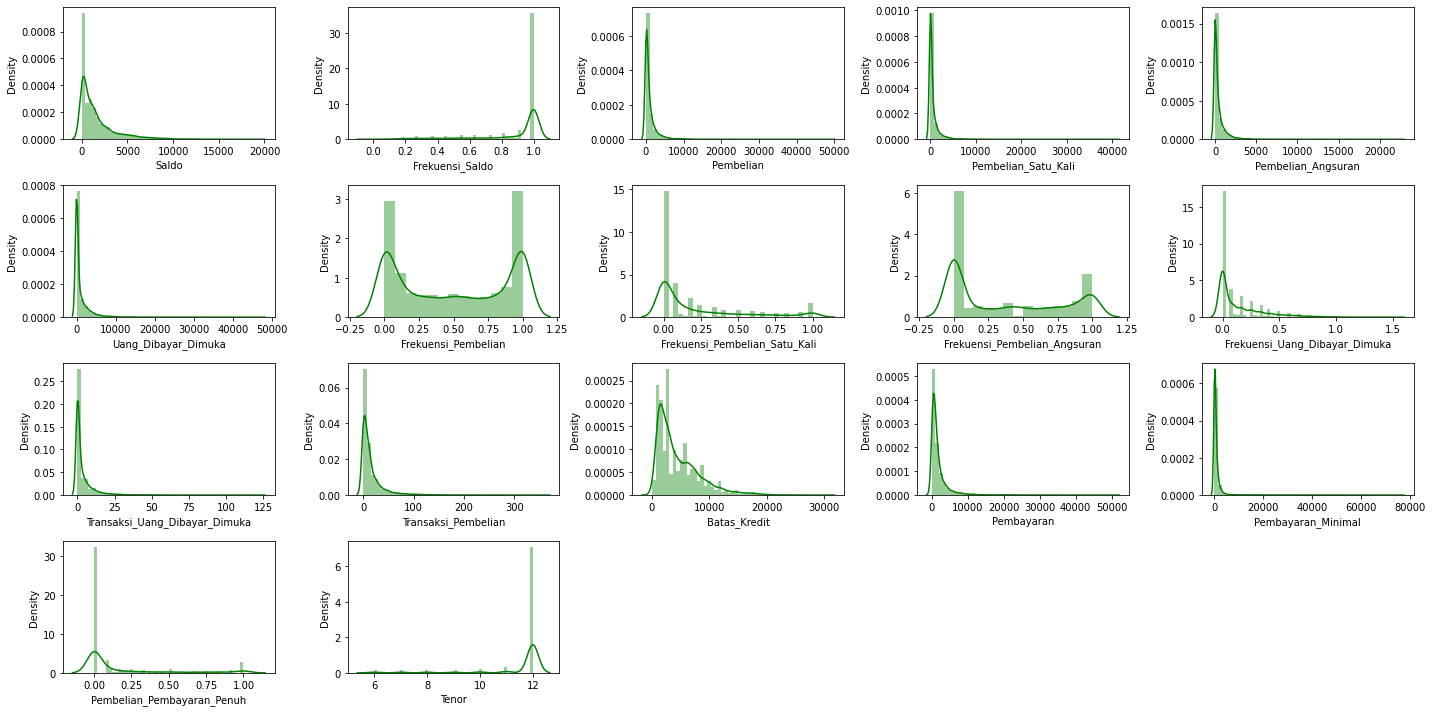

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = customer.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1)
    sns.distplot(customer[num[i]], color='green')
    plt.tight_layout()
plt.show()

Dari hasil Visualisasi histogram didapatan beberapa informasi :<br>
1. customer didominasi dengan jumlah saldo pada interval 0 hingga 5000. <br>
2. customer didominasi oleh orang orang yang sering melakukan pembaruan saldo. <br>
3. customer didominasi oleh orang orang yang yang melakukan jumlah pembelian pada interval 0 hingga 1200. <br>
4. customer didominasi dengan pembelian satu kali dengan jumlah pada interval 0-500. <br>
5. frekuensi customer yang sering memperbarui saldo dengan customer yang sering memperbarui saldo relatif sama. <br>

In [ ]:
customer['Tenor'].value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: Tenor, dtype: int64

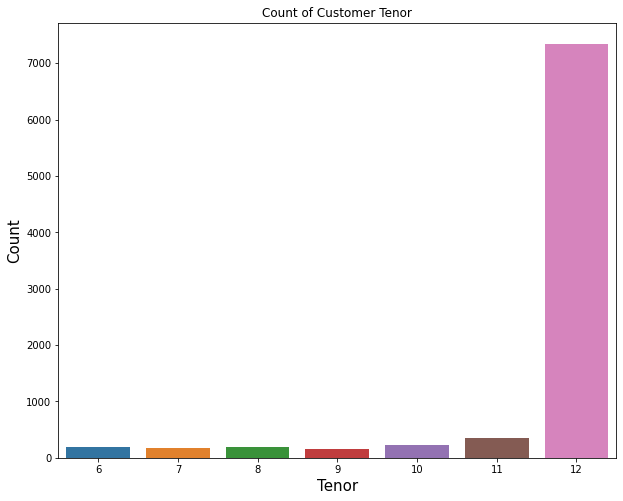

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=customer,x='Tenor')
plt.title('Count of Customer Tenor')
plt.xlabel('Tenor',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

1.cutomer didominasi oleh tenor 12 sangat banyak dibandingkan dengan yang lain, disusul pada tenor 11dan 10, sedangkan tenor 6,7,8, dan 9 memiliki nilai yang relative sama. <br> 2. sebanyak 7346 customer yang telah menggunakan jasa bank selama 12 tahun, artinya banyak cutomer yang loyal hingga 12 tahun dan juga percaya terhadap pelayanan yang telah diberikan oleh bank.

In [ ]:
customer.columns

Index(['Saldo', 'Frekuensi_Saldo', 'Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Satu_Kali', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal', 'Pembelian_Pembayaran_Penuh', 'Tenor'],
      dtype='object')

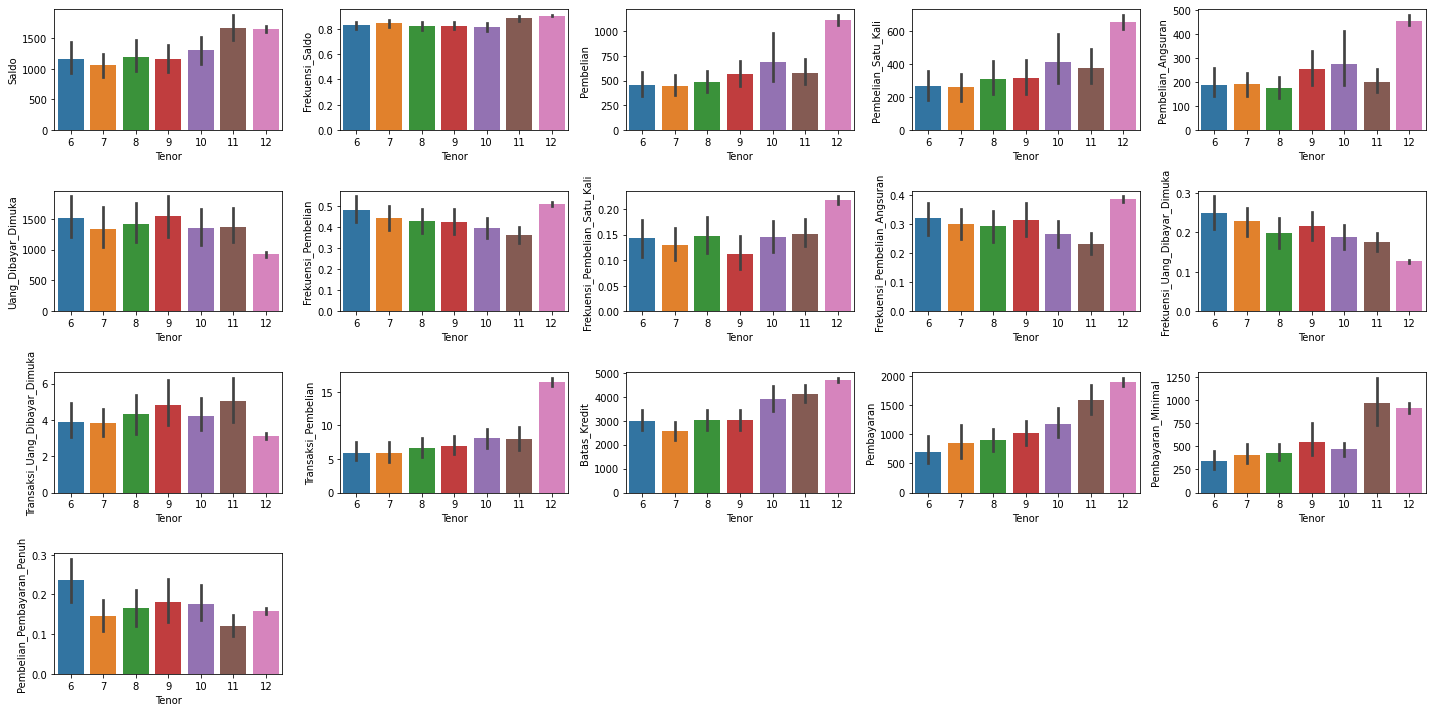

In [ ]:
col = ['Saldo', 'Frekuensi_Saldo', 'Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Satu_Kali', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal', 'Pembelian_Pembayaran_Penuh']

fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)

for i in range(0, len(col)):
    plt.subplot(4,5, i+1)
    sns.barplot(data=customer,x=customer['Tenor'],y=customer[col[i]])
    plt.tight_layout()
plt.show()


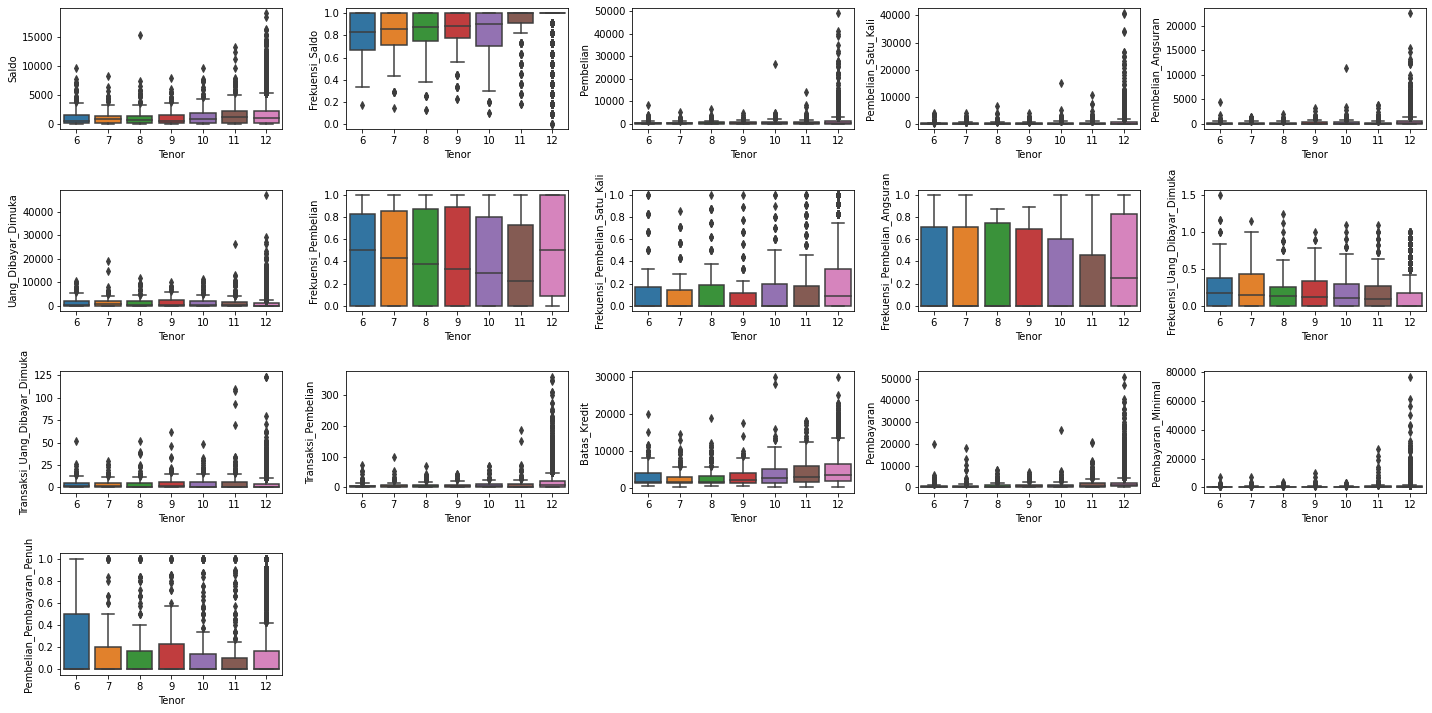

In [ ]:
col = ['Saldo', 'Frekuensi_Saldo', 'Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Satu_Kali', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal', 'Pembelian_Pembayaran_Penuh']

fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)

for i in range(0, len(col)):
    plt.subplot(4,5, i+1)
    sns.boxplot(data=customer,x=customer['Tenor'],y=customer[col[i]])
    plt.tight_layout()
plt.show()

berdasarkan grafik bar plot beberapa informasi yang didapatkan adalah :
1. kecendrungan peningkatan saldo terhadap waktu pemakaian jasa, hubungannya semakin lama customer maka saldo yang dimiliki samkin besar. <br>
2. customer yang sudah 12 tahun menggunakan jasa bank, memiliki pembelian yang tinggi, dari grafik juga ditunjukkan secara umum semakin lama tenor customer, maka perilaku pembelian semakin meningkat. <br>
3. terdapat kasus unik untuk hubungan frekuensi pembelian dengan lama tenor, dimana pada customer dengan tenor 6 tahun lebih sering melakukan pembelian, ketika tenor meningkat kecendrungan frekuensi pembelian menurun tetapi meningkat kembali secara signifikant pada saat customer memiliki tenor 12 tahun. <br>
4.untuk frekuensi pembayaran dimuka, ketika mengalami penurunan ketikan tenor meningkat. <br>
5. batas kredit meningkat ketika tenor meningkat, hal ini cukup masuk akal karena peningkatan saldo juga meningkat, sehingga kemungkinan customer akan meningkatkan jumlah limit dengan keperluan tertentu, pernyataan ini didukung dengan hubungan pembayaran dengan tenor yang meningkat seiring tenor meningkat.

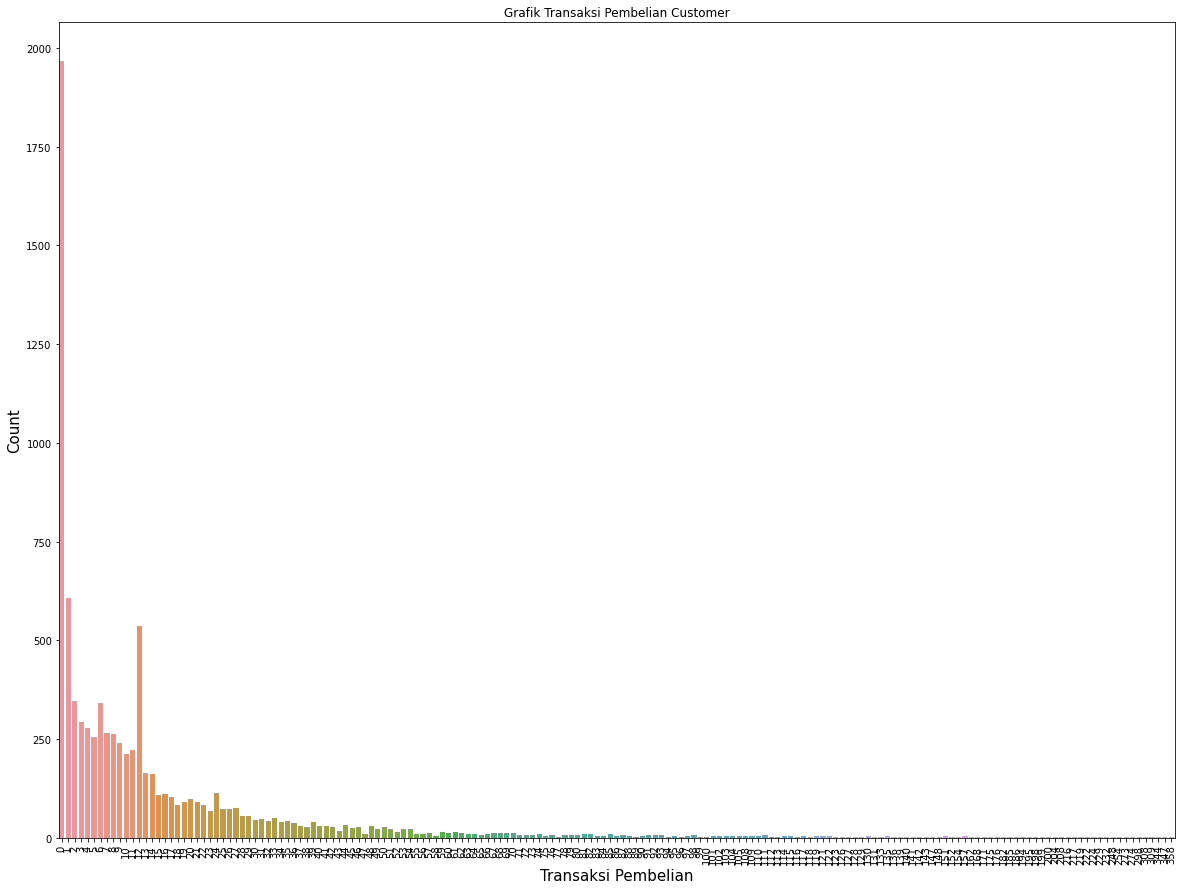

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=customer,x='Transaksi_Pembelian')
plt.title('Grafik Transaksi Pembelian Customer')
plt.xlabel('Transaksi Pembelian',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=15)
plt.show()

Dari grafik diatas pada transaksi pembelian, sangat banyak sekali customer yang tidak memiliki transaksi pembelian, kemudian customer yang memiliki transaksi pembelian sebanyak sekali dan 12 kali cukup bayak.

In [ ]:
#analisa customer dengan total transaksi pmbelian 0
analisa_transaksinol = customer[(customer['Transaksi_Pembelian']==0)]
analisa_transaksinol.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.0,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,2208.551872,0.903136,0.399675,0.000122,0.444774,2007.458278,0.000763,0.000042,0.000763,0.276582,6.403152,0.0,4058.218946,1726.829231,1006.934432,0.046313,11.359939
std,2124.674226,0.198900,15.071288,0.005411,15.249476,2500.117089,0.023909,0.001879,0.023909,0.202463,8.182161,0.0,3287.744790,2815.951503,2617.727380,0.140966,1.497567
min,0.001146,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,50.000000,0.049513,0.117036,0.000000,6.000000
25%,825.277817,0.909091,0.000000,0.000000,0.000000,376.484937,0.000000,0.000000,0.000000,0.100000,2.000000,0.0,1500.000000,395.260661,266.765542,0.000000,12.000000
50%,1502.444690,1.000000,0.000000,0.000000,0.000000,1221.854430,0.000000,0.000000,0.000000,0.250000,4.000000,0.0,3000.000000,803.519921,487.840515,0.000000,12.000000
75%,2877.462406,1.000000,0.000000,0.000000,0.000000,2713.655070,0.000000,0.000000,0.000000,0.363636,8.000000,0.0,6000.000000,1780.777957,1011.323846,0.000000,12.000000
max,14581.459140,1.000000,655.680000,0.240000,655.680000,26194.049540,1.000000,0.083333,1.000000,1.500000,123.000000,0.0,19000.000000,34107.074990,61031.618600,1.000000,12.000000


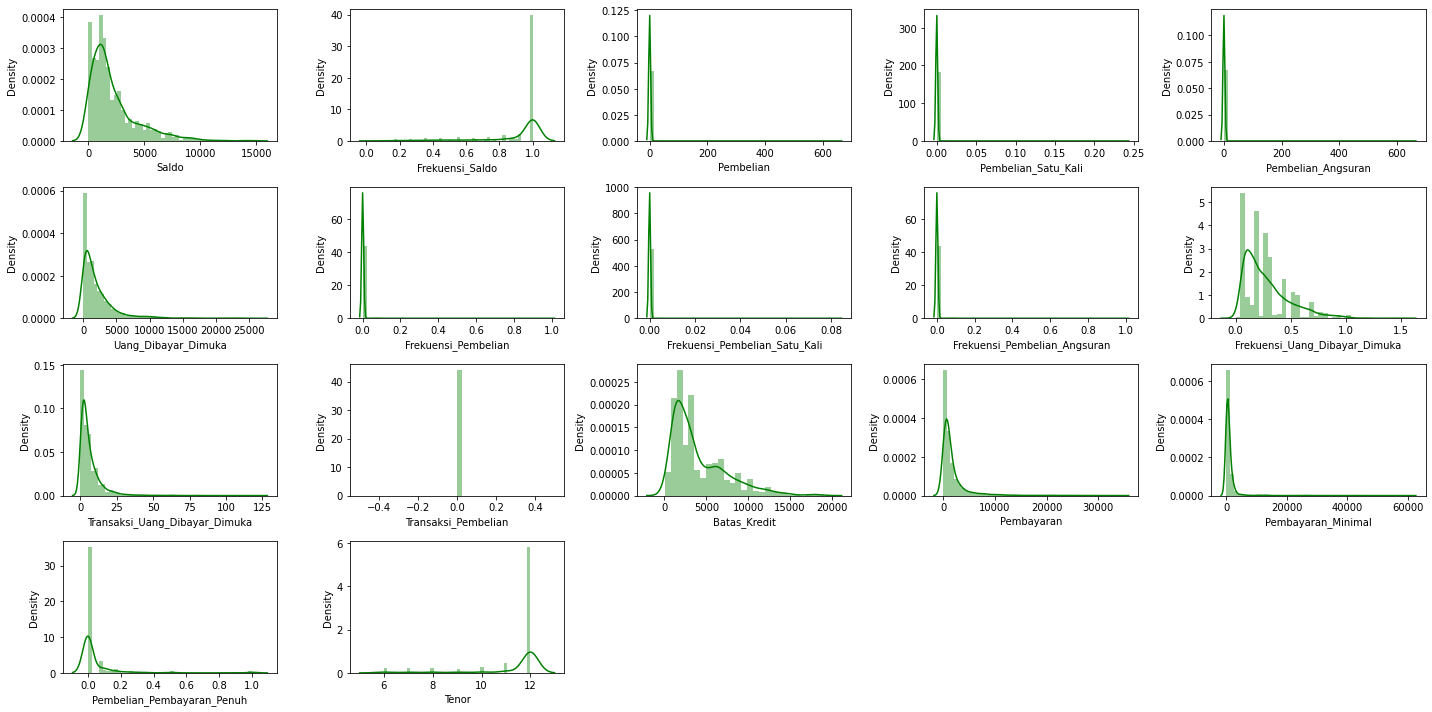

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = analisa_transaksinol.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1)
    sns.distplot(analisa_transaksinol[num[i]], color='green')
    plt.tight_layout()
plt.show()

dari analisa deskirptif untuk customer yang memiliki catatan transaksi 0  : <br>
1. rata rata saldo sangat tinggi yaitu 2208.55. <br>
2. rata rata frekuensi mendekati satu, sehingga dapat dikatan bahwa transaksi pembelian 0 adalah customer yang sayang sering memperbarui saldo. <br>
3. dari catatan pembelian, customernya memiliki pola pembelian barang dengan harga yang murah karena dapat dilihat dari rata rata,Q1,Q2 dan Q3 semua menunjukkan angka 0. <br>
4. customer dengan transaksi 0 juga tergolong customer yang loyal karena didominasi oleh customer yang sudah bersama perusahaan selama 12 tahun.

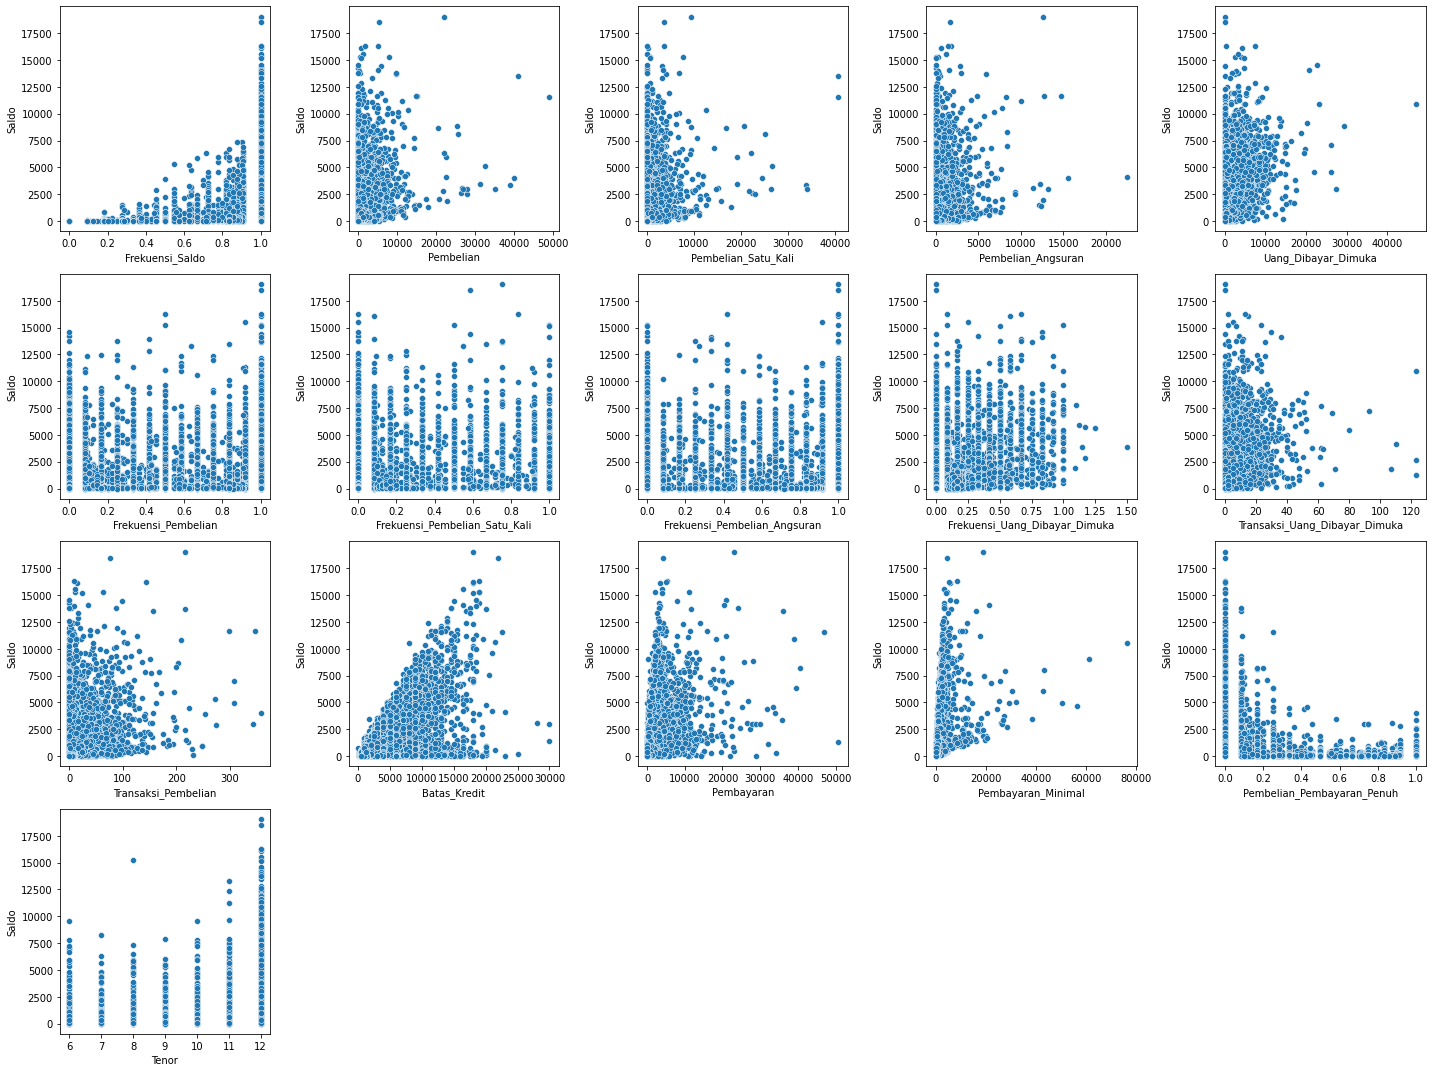

In [ ]:
scatter_colomn = ['Frekuensi_Saldo', 'Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Satu_Kali', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal', 'Pembelian_Pembayaran_Penuh','Tenor']
fig, ax = plt.subplots(figsize=(20,15))
plt.margins(1.5)
for i in range(0, len(scatter_colomn)):
    plt.subplot(4,5, i+1)
    sns.scatterplot(x=customer[scatter_colomn[i]], y=customer['Saldo'])
    plt.tight_layout()
plt.show()

dari grafik scatter plot didapatkan beberapa informasi :<br>
1. customer yang memiliki saldo lebih dari 7500 pasti akan selalu memperbarui saldo.<br>
2. adanya korelasi positif antar jumlah saldo dengan batas kredit, dimana semakin besar jumlah saldo maka batas kredit akan semakin besar. <br>
3. adanya korelasi negatif antara saldo dengan pembelian pembayaran sekali penuh, dimana semakin tinggi persentase pembayaran penuh, saldo customer cenderung semakin berkurang.

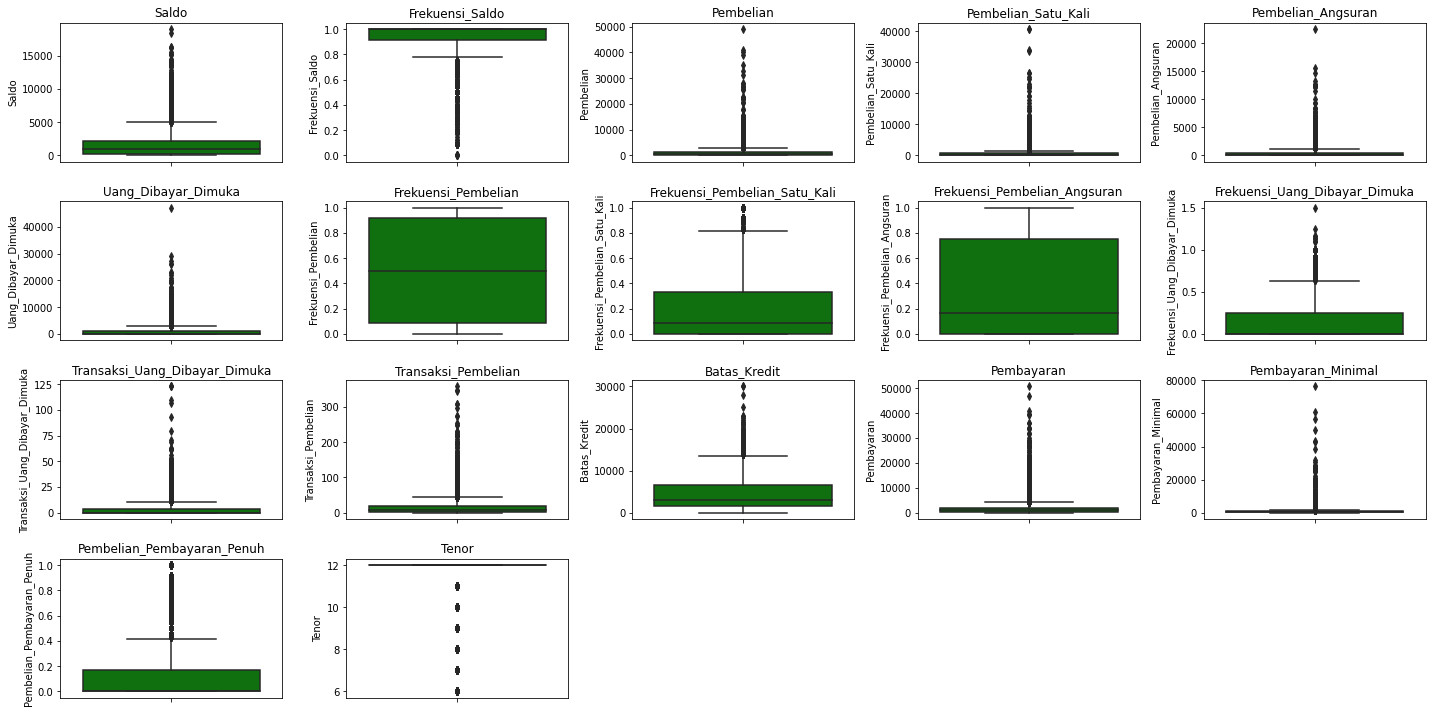

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = customer.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1).set_title(num[i])
    sns.boxplot(y=customer[num[i]], color='green')
    plt.tight_layout()
plt.show()

semua kolom banyak memiliki outlier yang banyak sehingga tidak akan dilakukan remove outlier agar tidak kehilangan informasi yang signifikan.

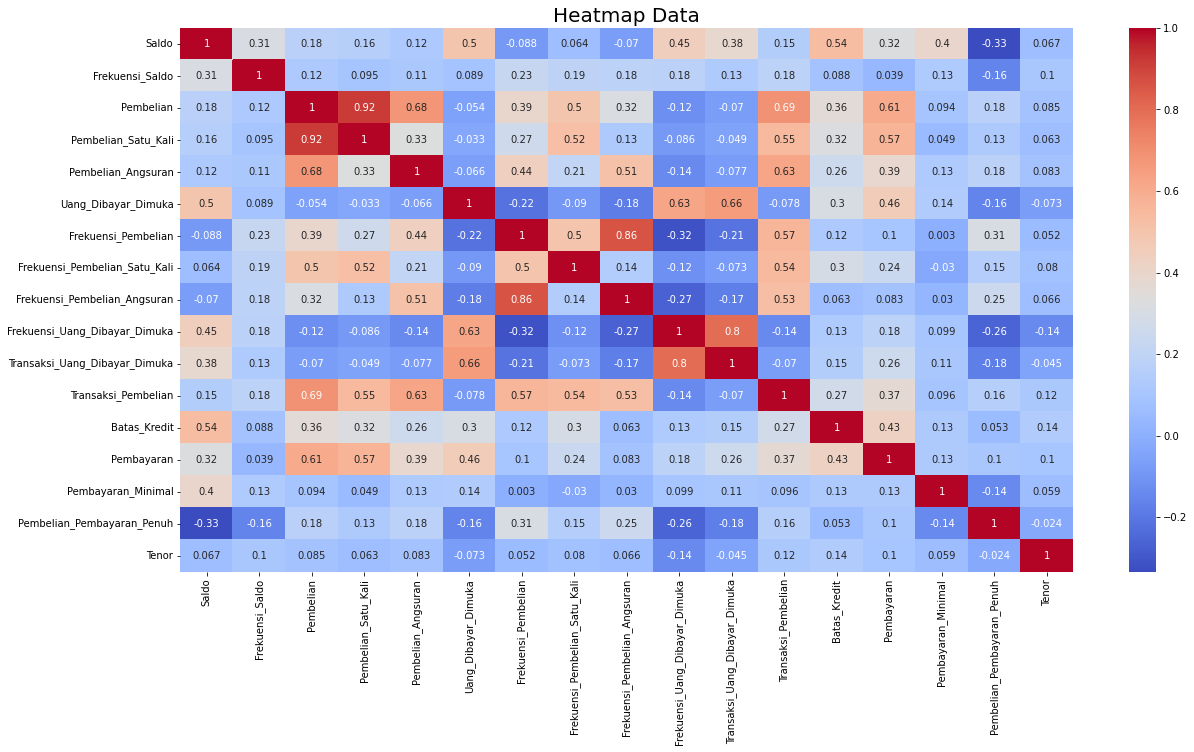

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(customer.corr(),cmap = 'coolwarm', annot = True,fmt=".2g")
plt.title('Heatmap Data', fontsize = 20)
plt.show()

dari grafik heatmap terlihat ada banya fitur yang saling berkolerasi kuat, cukup sulit untuk membuat model dengan melakukan pemeilihan fitur secara manual, sehingga proses dalam pembuat model, pereduksian fitur akan dilakukan dengan bantuan PCA

#DATA PRE-PROCESSING

## PCA

In [ ]:
cluster_new = customer.copy()


In [ ]:
cluster_new

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Data Scaling
scaler = StandardScaler()

melakukan proses scalling untuk menghilangkan gap antara kolom, dan karena ada ketimpangan pada kolom Tenor maka proses reduksi pca tidak akan memasukkan kolom Tenor

In [ ]:
cluster_new[['Saldo','Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka','Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal']] = scaler.fit_transform(cluster_new[['Saldo','Pembelian', 'Pembelian_Satu_Kali',
       'Pembelian_Angsuran', 'Uang_Dibayar_Dimuka','Transaksi_Uang_Dibayar_Dimuka',
       'Transaksi_Pembelian', 'Batas_Kredit', 'Pembayaran',
       'Pembayaran_Minimal']])
cluster_new.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,-0.744625,0.818182,-0.429184,-0.359160,-0.354826,-0.468655,0.166667,0.000000,0.083333,0.00,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,0.000000,12
1,0.764152,0.909091,-0.473208,-0.359160,-0.458839,2.568556,0.000000,0.000000,0.000000,0.25,0.099258,-0.597054,0.677204,0.796852,0.087689,0.222222,12
2,0.426602,1.000000,-0.116413,0.099909,-0.458839,-0.468655,1.000000,1.000000,0.000000,0.00,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,0.000000,12
3,-0.373910,1.000000,-0.465825,-0.349660,-0.458839,-0.468655,0.083333,0.083333,0.000000,0.00,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,0.000000,12
4,0.099551,1.000000,0.142062,-0.359160,0.994815,-0.468655,0.666667,0.000000,0.583333,0.00,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,0.000000,12


In [ ]:
cluster_new.drop('Tenor',axis=1,inplace=True)
cluster_new.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh
0,-0.744625,0.818182,-0.429184,-0.359160,-0.354826,-0.468655,0.166667,0.000000,0.083333,0.00,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,0.000000
1,0.764152,0.909091,-0.473208,-0.359160,-0.458839,2.568556,0.000000,0.000000,0.000000,0.25,0.099258,-0.597054,0.677204,0.796852,0.087689,0.222222
2,0.426602,1.000000,-0.116413,0.099909,-0.458839,-0.468655,1.000000,1.000000,0.000000,0.00,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,0.000000
3,-0.373910,1.000000,-0.465825,-0.349660,-0.458839,-0.468655,0.083333,0.083333,0.000000,0.00,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,0.000000
4,0.099551,1.000000,0.142062,-0.359160,0.994815,-0.468655,0.666667,0.000000,0.583333,0.00,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,0.000000


In [ ]:
pca = PCA(n_components=2)
pca.fit(cluster_new)
pca_transform = pca.transform(cluster_new)
pca_transform

array([[-1.55267012, -0.69955162],
       [ 0.23016525,  2.51479069],
       [-0.06034134, -0.15656224],
       ...,
       [-1.40516987, -0.90180723],
       [-1.69684634, -0.51875087],
       [-0.65411491, -0.89522808]])

In [ ]:
cluster_pca = pd.DataFrame(data=pca_transform,columns=['pca1','pca2'])
cluster_pca

,pca1,pca2
0,-1.552670,-0.699552
1,0.230165,2.514791
2,-0.060341,-0.156562
3,-1.442769,-0.452346
4,-0.099292,-0.633872
...,...,...
8631,-1.685100,-0.716815
8632,-1.240143,-0.995396
8633,-1.405170,-0.901807
8634,-1.696846,-0.518751


In [ ]:
# check the explained variance
print('explained variance:',pca.explained_variance_ratio_)

explained variance: [0.35949864 0.22780813]


dari hasil reduksi dimensi menggunakan PCA informasi yang hilang sekitar 35% sehingga hal ini tidak menjadi masalah karena masih banyak infomasi yang tersimpan untuk menjelaskan perilaku customer

# MODELING

In [ ]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_pca)
    Sum_of_squared_error.append(km.inertia_)

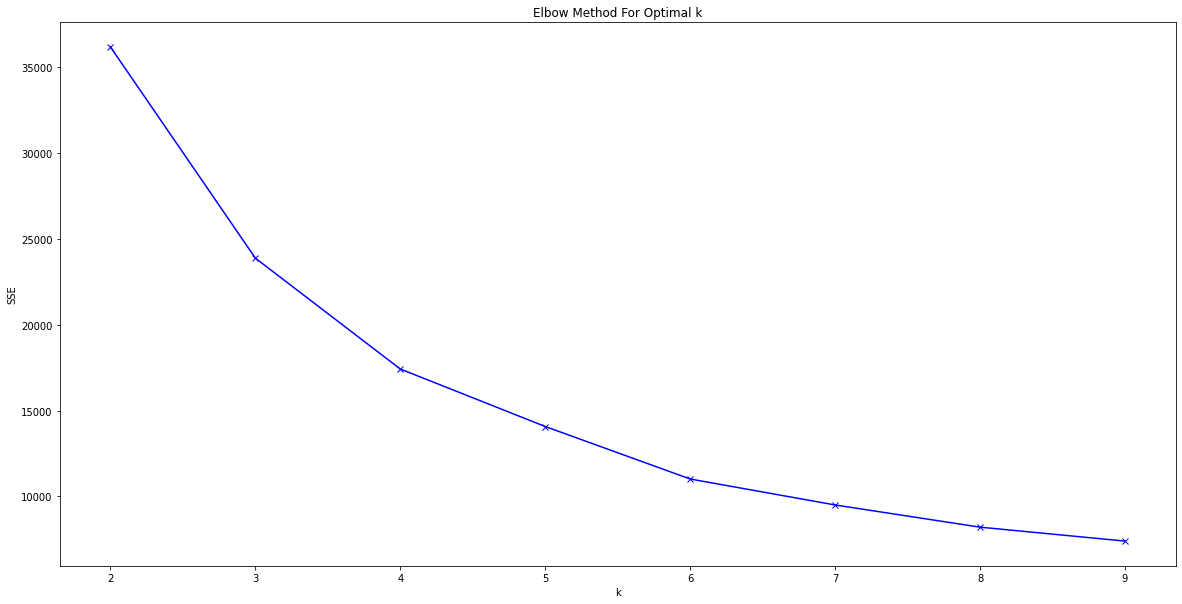

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

dari grafk menunjukkan K cluster K=3 atau K=4, model akan dievaluasi menggunakan silhotte method

## Evaluation Model

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_pca, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6138508428489835
For n_clusters = 3, silhouette score is 0.581155923676399
For n_clusters = 4, silhouette score is 0.562598906112909
For n_clusters = 5, silhouette score is 0.4890686346705536
For n_clusters = 6, silhouette score is 0.4869587047832269
For n_clusters = 7, silhouette score is 0.4483910943173569
For n_clusters = 8, silhouette score is 0.4374152749679159
For n_clusters = 9, silhouette score is 0.3971416478419992


dari hasil grafik elbow terlihat bahwa K mean berada pada 3 dan 4 serta hasil dari evaluasi model menunjukkan score silhoutte untuk K mean terbaik berada pada K = 2 dengan skor 61,38% namun hal ini kurang masuk akal menurut saya jika memilih K = 2, dan setelah melakukan beberapa percobaan untuk K=3 dan K=4, saya menemukan Kluster yang masuk akal adalah K=3 karena pola prilaku customer lebih terlihat.

In [ ]:
# Memodelkan data dengan k-means
kmean= KMeans(3)
kmean.fit(customer)
labels=kmean.labels_

In [ ]:
clusters=pd.concat([customer, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


# Exploration Data Analytics

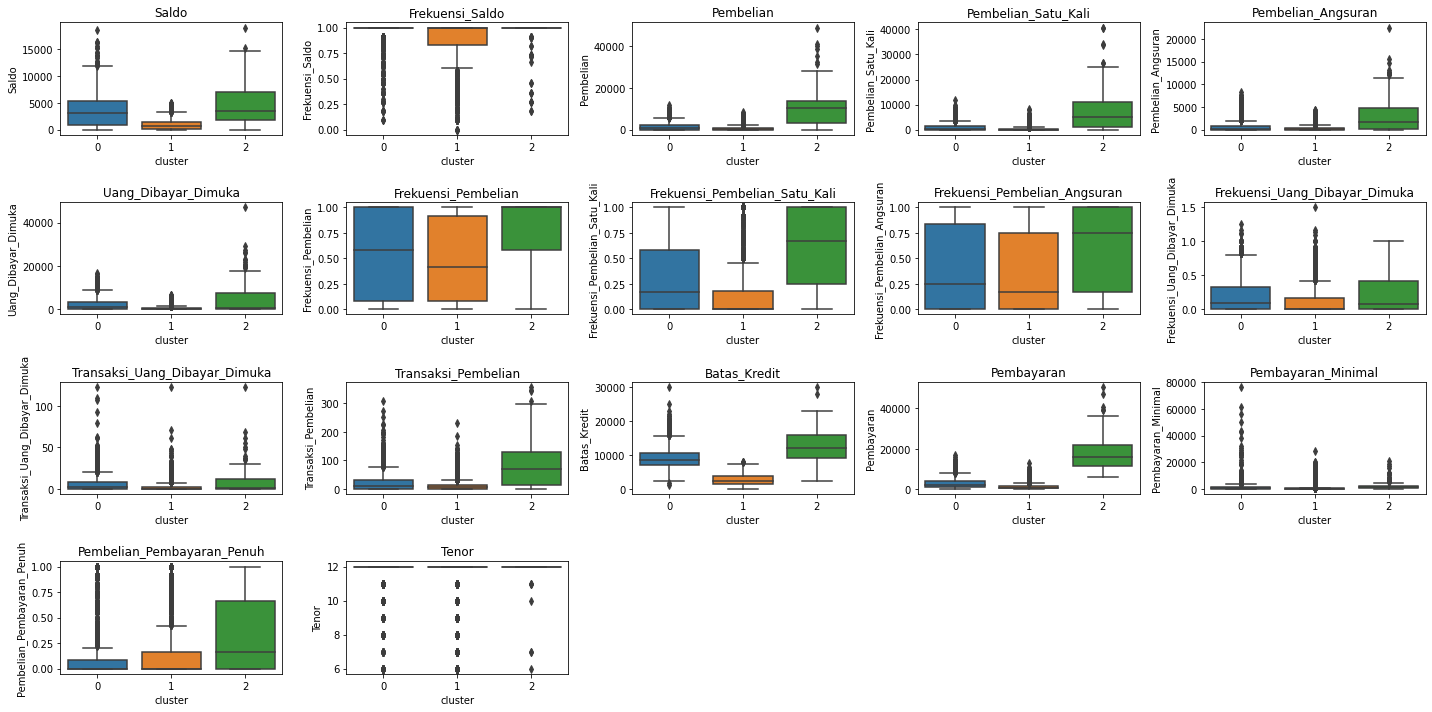

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = clusters.select_dtypes(include=['int64','float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1).set_title(num[i])
    sns.boxplot(data=clusters,x='cluster',y=clusters[num[i]])
    plt.tight_layout()
plt.show()

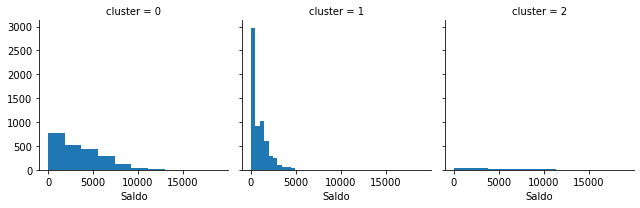

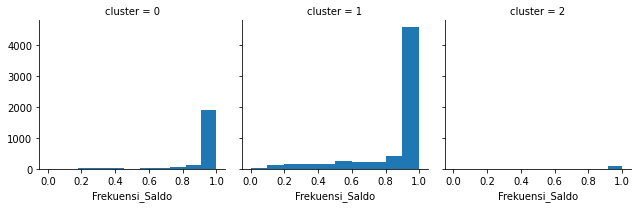

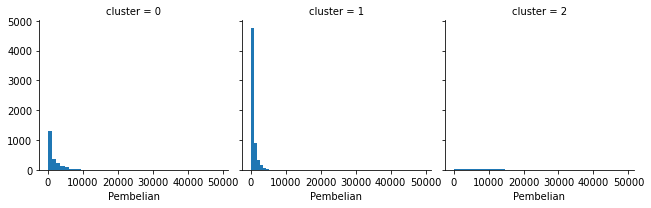

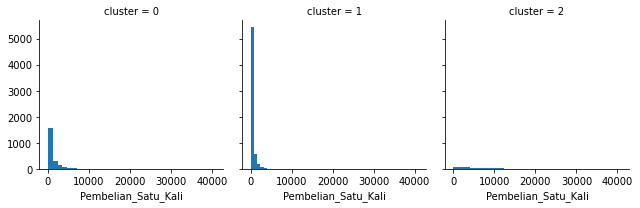

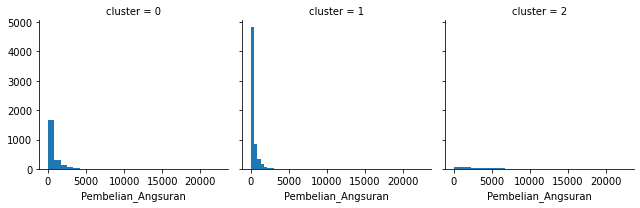

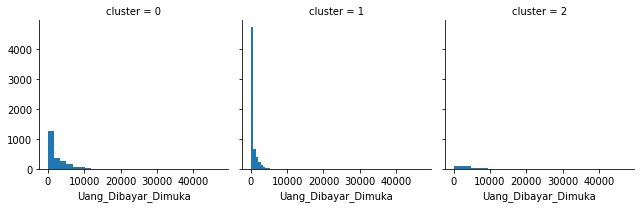

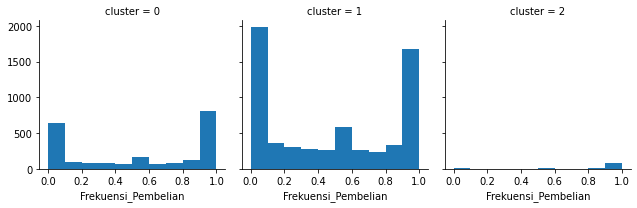

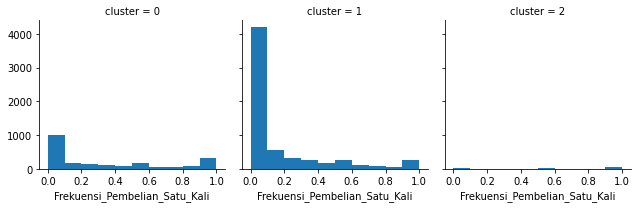

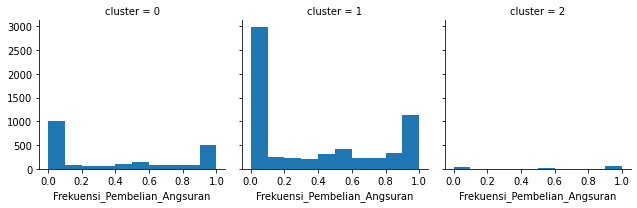

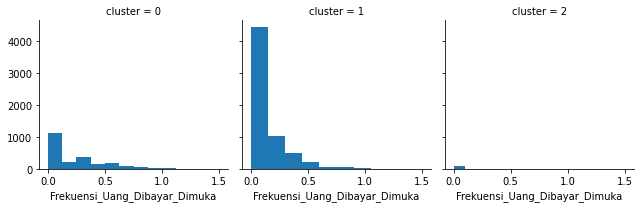

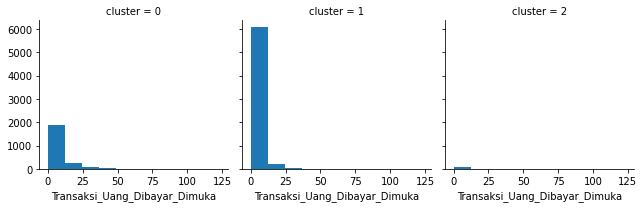

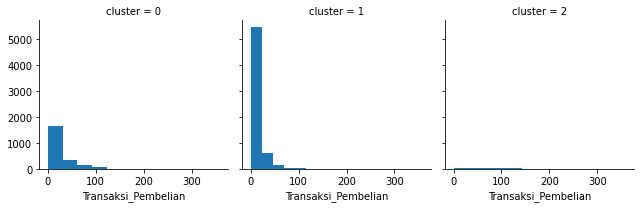

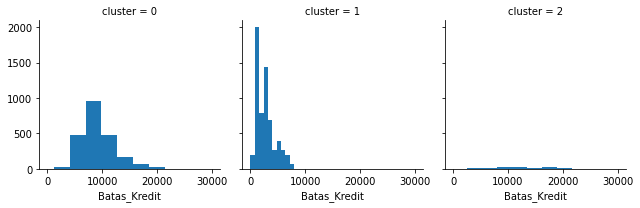

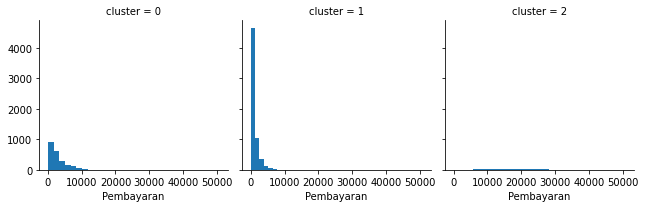

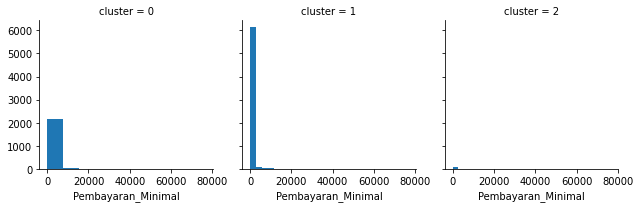

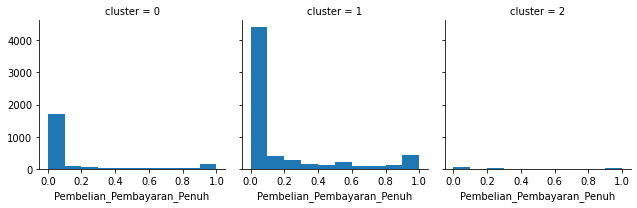

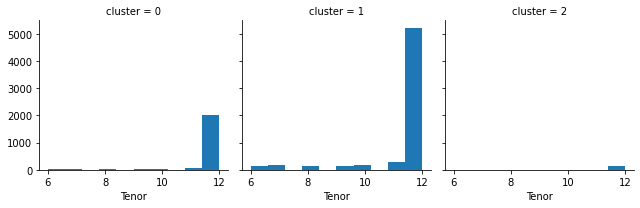

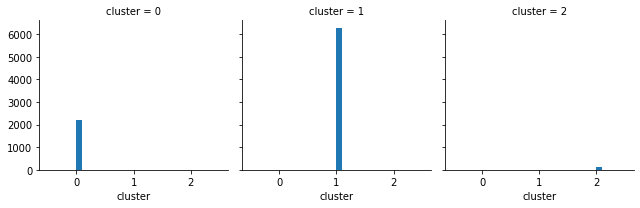

In [ ]:
for i in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, i)

In [ ]:
clusters.groupby('cluster').mean()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
cluster,,,,,,,,,,,,,,,,,
0,3459.505050,0.946725,1599.574631,995.575645,604.322800,2150.68567,0.542336,0.318130,0.389146,0.214577,5.853912,22.433740,9048.667818,2961.615494,1596.562435,0.133820,11.737223
1,881.480399,0.876420,622.436620,323.163177,299.582954,502.02433,0.474369,0.158352,0.356765,0.108715,2.299873,10.962675,2769.317596,1038.219112,573.070513,0.164611,11.456957
2,4879.162142,0.917611,10853.693566,7659.501628,3194.362481,5192.15982,0.757564,0.603537,0.608806,0.228296,9.271318,86.860465,12484.883721,18030.957208,2527.798391,0.337067,11.837209



Cluster 0

Saldo : Medium <br>
Frekuensi Saldo : high <br>
Pembelian : High <br>
Frekuensi Pembelian : Medium <br>
Pembayaran Minimal : Medium <br>
Credit Limit : medium <br>

Cluster 1

Saldo : low <br>
Frekuensi Saldo : high <br>
Pembelian : low <br>
Frekuensi Pembelian : low <br>
Pembayaran Minimal : low <br>
Credit Limit : low <br>

Cluster 2

Saldo : High <br>
Frekuensi Saldo : high <br>
Pembelian : High <br>
Frekuensi Pembelian : High <br>
Pembayaran Minimal : High <br>
Credit Limit : High <br>

## KESIMPULAN
untuk cluster 1, rekomendasikan **silver credit card** karena ini adalah kartu yang paling banyak dimiliki. Secara umum, pemegang kartu kredit baru akan menerima kartu perak dan mereka dapat meningkatkannya nanti. Kartu silver memiliki limit kredit paling rendah yaitu sekitar Rp 4 juta hingga Rp 7 juta. Pemegang kartu harus memiliki gaji bulanan minimal Rp 3 juta. Kelebihan dari kartu ini adalah limit yang tidak terlalu tinggi. <br>

untuk cluster 0, rekomendasikan **gold credit card**. Pemegang kartu harus memiliki penghasilan rutin bulanan sekitar Rp 5 juta hingga Rp 10 juta. Limit kredit berkisar antara Rp 10 juta hingga Rp 40 juta, tergantung bank penerbit kartu kredit. Kelebihan dari jenis kartu ini adalah limit yang cukup besar. Jadi, ini memungkinkan Anda untuk membeli/memiliki barang-barang mahal lebih cepat. Anda bisa menggunakannya untuk mencicil barang-barang berbujet besar seperti sepeda motor atau smartphone. Namun, semakin tinggi batas kartu kredit, semakin tinggi biaya tahunan yang harus Anda bayar.

untuk cluster 2, kartu **platinum credit card** dengan level tertinggi. Kartu kredit Platinum hanya dimiliki oleh segelintir orang karena tidak mudah untuk mendapatkan kartu karena prosedur yang ketat. Kartu kredit platinum memiliki limit tinggi mulai dari Rp 40 juta hingga Rp 1 miliar. Pemegang kartu harus memiliki penghasilan minimal Rp 180 juta per tahun dan memiliki riwayat kredit yang baik.



rujukan referensi : https://medium.com/analytics-vidhya/credit-card-customers-segmentation-bc3c5c87ddc